# 11강. 시계열 데이터 분해법

## set up

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
from pandas_datareader import data as pdr
data = pdr.get_data_yahoo("GS", start="1999-05-04", end="2017-09-28")

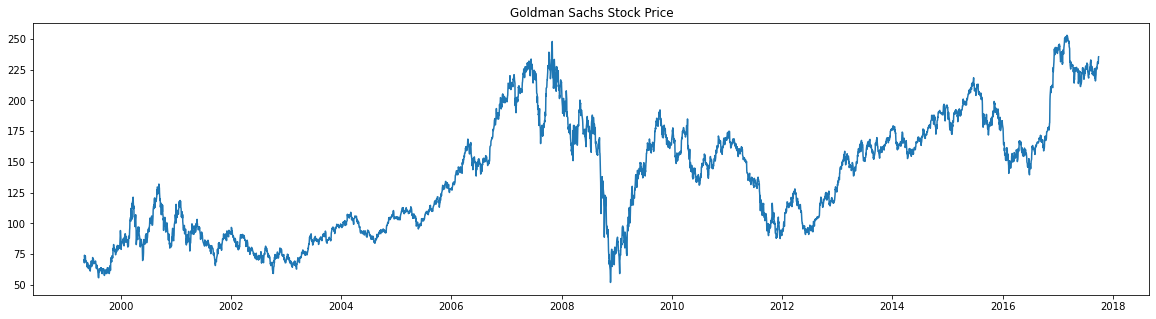

In [2]:
def plot(df,title):
    plt.figure(figsize=[20,5])
    plt.plot(df)
    plt.title(title)
    plt.show()
    
plot(data[['Close']],"Goldman Sachs Stock Price")

단순 이동 평균 
- 과거 일정 기간 데이터들을 평균함으로써 시계열을 smoothing 함 
- pandas의 rolling 함수를 이용해서 데이터를 밑으로 내리고 mean을 구합니다
- 아래의 경우 moving average는 산술평균을 통해서 동일한 weight가 들어가게 됩니다. 

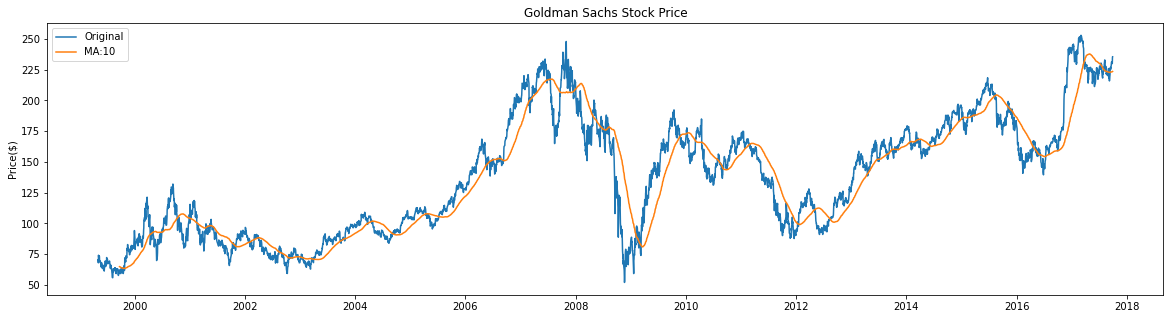

In [3]:
def plot(df,title):
    plt.figure(figsize=[20,5])
    plt.plot(df,label = "Original")
    plt.plot(df.rolling(100).mean(),label = "MA:10")
    plt.legend()
    plt.title(title)
    plt.ylabel("Price($)",rotation=90)
#     plt.yticks(rotaion =90)
    
    plt.show()
    
plot(data[['Close']],"Goldman Sachs Stock Price")

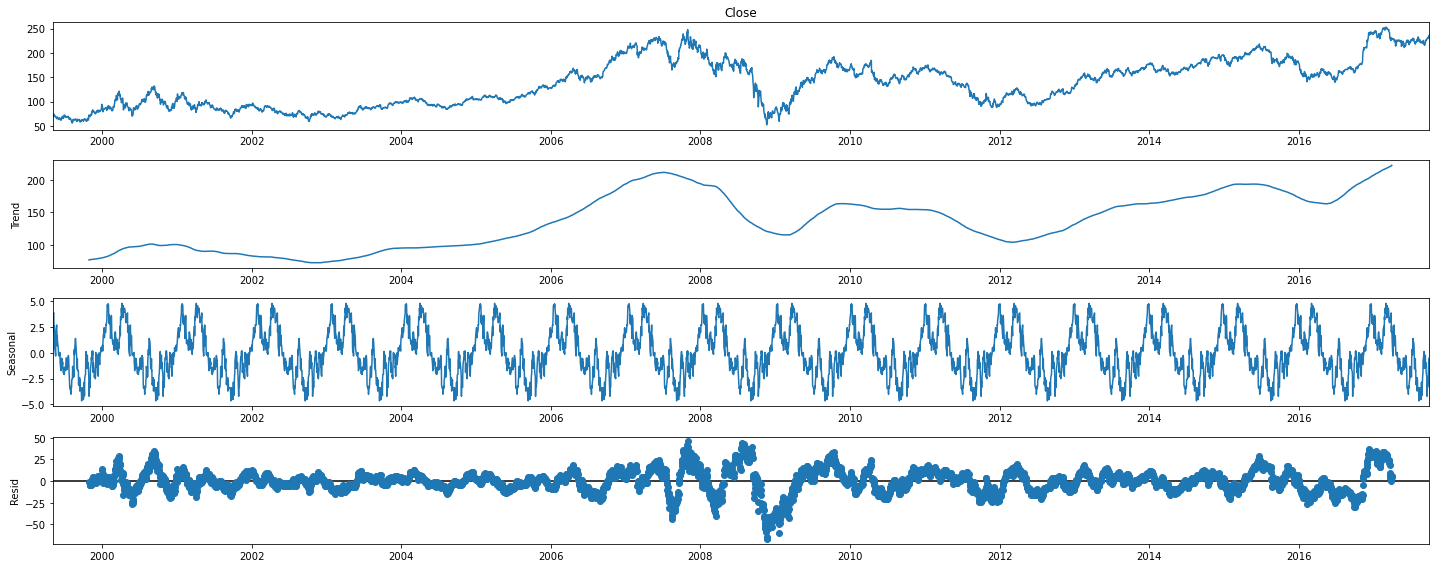

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose 

result = seasonal_decompose(data['Close'], model = "additive",period= 250)

plt.rcParams['figure.figsize'] = [20, 8]
result.plot()
plt.show()

<img src='./IMG/img5.png'>

In [32]:
pd.infer_freq(data.index)

In [33]:
 # Holt-winters 모형
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# Set the frequency of the date time index as Monthly start as indicated by the data
data.index.freq = None
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)

C:\Users\sk\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sk\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


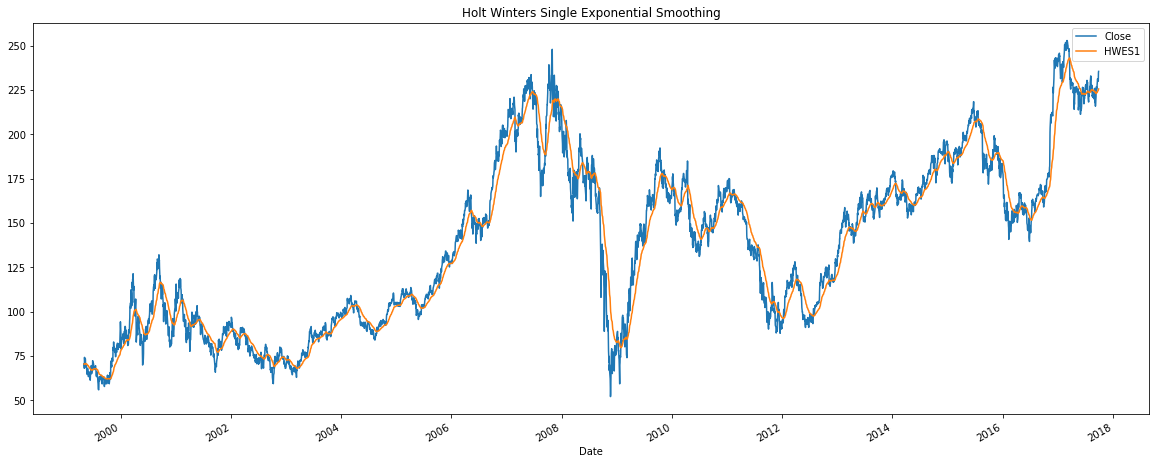

In [34]:
data['HWES1'] = SimpleExpSmoothing(data['Close']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
data[['Close','HWES1']].plot(title='Holt Winters Single Exponential Smoothing');